In [35]:
import sys
import os

# Add the build directory to Python path
build_dir = os.path.abspath('/Users/kisel/uni/apal/Algorithm-Selector/Implementation/lib')
sys.path.insert(0, build_dir)

# Add the data directory to Python path
data_dir = os.path.abspath('/Users/kisel/uni/apal/Algorithm-Selector/Implementation/data')
sys.path.insert(0, data_dir)

import pandas as pd
from tqdm import tqdm
import numpy as np

import sorters
import probes

import list_generators as lg

In [36]:
probe_list = probes.list_probes()
sort_list = sorters.list_sorters()
sort_list, probe_list

(['counting_sort',
  'heap_sort',
  'insertion_sort',
  'merge_sort',
  'quick_sort',
  'quick_merge_sort',
  'ska_sort',
  'spin_sort',
  'spread_sort',
  'std_sort',
  'tim_sort'],
 ['dis',
  'enc',
  'exc',
  'ham',
  'inv',
  'max',
  'mono',
  'osc',
  'rem',
  'runs',
  'sus'])

In [37]:
#sizes = [1, 10, 100, 1000, 10000, 100000]
#
#dataset = []
#for size in sizes:
#    baselist = lg.generate_list(size)
#    randomlist = lg.randomize_list(baselist)
#    dataset.append(randomlist)

In [38]:
data = pd.read_feather("/Users/kisel/uni/apal/Algorithm-Selector/Implementation/data/out.feather")
data = data.head(5000)
dataset = data["data"].tolist()
dataset

[array([], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6, 13,  8,  9, 44, 11, 12,  7, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 25, 26, 27, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 45, 46, 47]),
 array([47, 46, 45, 10, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31,
        30, 29, 28, 27, 27, 26, 25, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
        15, 14,  7, 12, 11, 44,  9,  8, 13,  6,  5,  4,  3,  2,  1,  0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7, 33,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 40, 22, 23, 41, 25, 25, 34, 27, 26, 28, 29, 30, 31,
        32,  8, 27, 35, 36, 37, 38, 39, 21, 24, 42, 43, 44, 45, 46, 47]),
 array([47, 46, 45, 44, 43, 42, 24, 21, 39, 38, 37, 36, 35, 27,  8, 32, 31,
        30, 29, 28, 26, 27, 34, 25, 25, 41, 23, 22, 40, 20, 19, 18, 17, 16,
        15, 14, 13, 12, 11, 10,  9, 33,  7,  6,  5,  4,  3,  2,  1,  0]),
 array([ 8,  1,  2,  3, 30,  5, 35,  7,  0,  9, 37, 11, 12, 13, 14, 15,

In [39]:
#data = pd.read_feather("/Users/kisel/uni/apal/Algorithm-Selector/Implementation/data/large_data.feather")
#dataset = data["large_data"].tolist()

In [40]:
probe_times = {}
sort_times = {}

for arr in tqdm(dataset):
    for probe in probe_list:
        t = probes.benchmark_probe_by_name(probe, arr)
        probe_times.setdefault(probe, []).append(t)
    
    for sorter in sort_list:
        t = sorters.benchmark_sorter(sorter, arr)
        sort_times.setdefault(sorter, []).append(t)

100%|██████████| 5000/5000 [00:03<00:00, 1346.30it/s]


In [41]:
for probe in probe_times:
    print("Probe times:", probe_times.get(probe))
print()
for sorter in sort_times:
    print("Sorter times:", sort_times.get(sorter))

Probe times: [0.000292, 0.000458, 0.000208, 0.000333, 0.000208, 0.000291, 0.000208, 0.000208, 0.000166, 0.000209, 0.000292, 0.000208, 0.000208, 0.00025, 0.000167, 0.00025, 0.000208, 0.000208, 0.000167, 0.000209, 0.000167, 0.000208, 0.000167, 0.00025, 0.000167, 0.000208, 0.000167, 0.000208, 0.000166, 0.000208, 0.000166, 0.000208, 0.000208, 0.000209, 0.000167, 0.000167, 0.000208, 0.000167, 0.000208, 0.000208, 0.000166, 0.000208, 0.000167, 0.000208, 0.000166, 0.000209, 0.000166, 0.000209, 0.000167, 0.000166, 0.000125, 0.000167, 0.000167, 0.000167, 0.000166, 0.000167, 0.000209, 0.000209, 0.000167, 0.000166, 0.000166, 0.00025, 0.000166, 0.000167, 0.000125, 0.000167, 0.000125, 0.000166, 0.000167, 0.000209, 0.000209, 0.000208, 0.000166, 0.000167, 0.000166, 0.000167, 0.000167, 0.000208, 0.000166, 0.000209, 0.000167, 0.000208, 0.000167, 0.000209, 0.000209, 0.000209, 0.000208, 0.000208, 0.000167, 0.000125, 0.000125, 0.000167, 0.000208, 0.000167, 0.000875, 0.000334, 0.000292, 0.000167, 0.000209, 

In [42]:
# Compute average times for each probe
avg_probe_times = {}
for probe, times in probe_times.items():
    avg_probe_times[probe] = sum(times) / len(times) if times else 0

# Compute average times for each sorter
avg_sort_times = {}
for sorter, times in sort_times.items():
    avg_sort_times[sorter] = sum(times) / len(times) if times else 0

# Print out average times
print("Average probe times (ms):")
for probe, avg_time in avg_probe_times.items():
    print(f"  {probe}: {avg_time:.2f}")

print("\nAverage sorter times (ms):")
for sorter, avg_time in avg_sort_times.items():
    print(f"  {sorter}: {avg_time:.2f}")

print("\nRatio of average probe time to average sorter time:")
for probe, avg_probe in avg_probe_times.items():
    for sorter, avg_sort in avg_sort_times.items():
        ratio = avg_probe / avg_sort if avg_sort != 0 else float('inf')
        print(f"  {probe} / {sorter}: {ratio:.2f}")

Average probe times (ms):
  dis: 0.00
  enc: 0.01
  exc: 0.01
  ham: 0.01
  inv: 0.02
  max: 0.03
  mono: 0.00
  osc: 0.03
  rem: 0.01
  runs: 0.00
  sus: 0.01

Average sorter times (ms):
  counting_sort: 0.00
  heap_sort: 0.01
  insertion_sort: 0.04
  merge_sort: 0.01
  quick_sort: 0.01
  quick_merge_sort: 0.01
  ska_sort: 0.01
  spin_sort: 0.01
  spread_sort: 0.01
  std_sort: 0.01
  tim_sort: 0.02

Ratio of average probe time to average sorter time:
  dis / counting_sort: 0.71
  dis / heap_sort: 0.10
  dis / insertion_sort: 0.03
  dis / merge_sort: 0.10
  dis / quick_sort: 0.12
  dis / quick_merge_sort: 0.08
  dis / ska_sort: 0.13
  dis / spin_sort: 0.11
  dis / spread_sort: 0.21
  dis / std_sort: 0.12
  dis / tim_sort: 0.06
  enc / counting_sort: 4.43
  enc / heap_sort: 0.63
  enc / insertion_sort: 0.18
  enc / merge_sort: 0.63
  enc / quick_sort: 0.73
  enc / quick_merge_sort: 0.52
  enc / ska_sort: 0.80
  enc / spin_sort: 0.71
  enc / spread_sort: 1.29
  enc / std_sort: 0.76
  enc

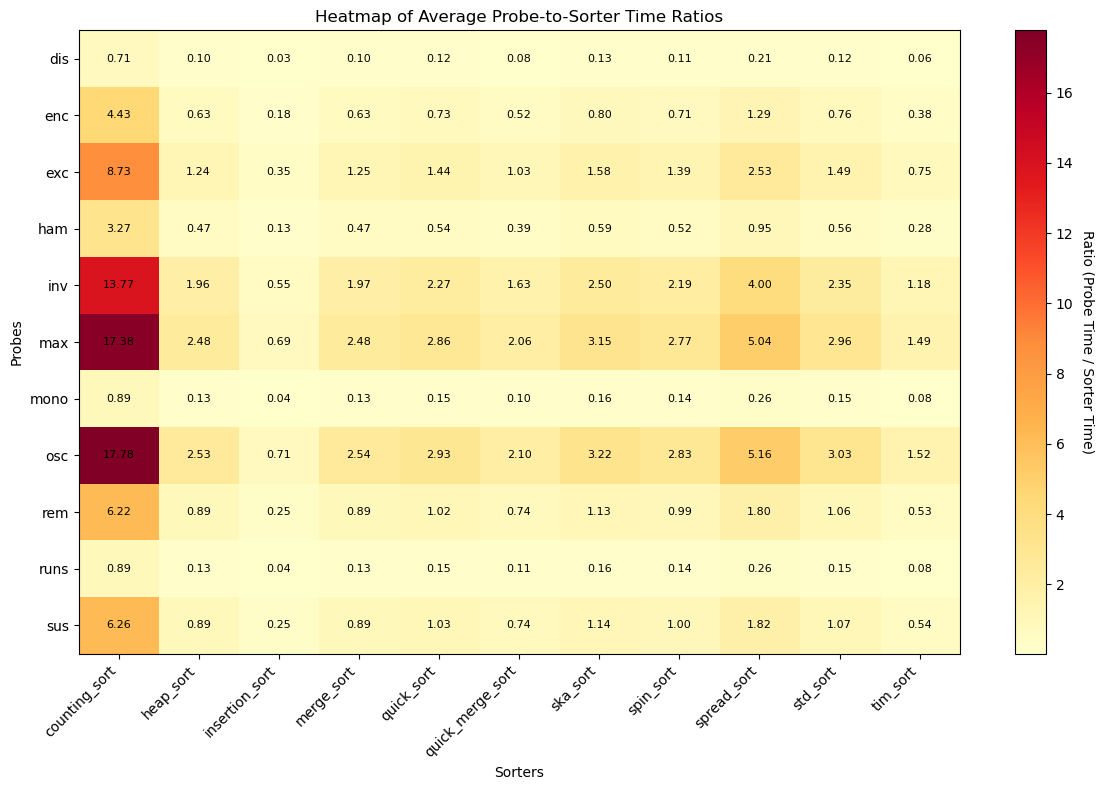

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assume avg_probe_times and avg_sort_times have been computed earlier
probe_names = list(avg_probe_times.keys())
sorter_names = list(avg_sort_times.keys())

# Create a 2D array (matrix) of ratios:
ratio_matrix = np.array([
    [avg_probe_times[probe] / avg_sort_times[sorter] if avg_sort_times[sorter] != 0 else 0 
     for sorter in sorter_names] 
    for probe in probe_names
])

# Optionally, set a fixed color scale or compute from data:
vmin = np.nanmin(ratio_matrix)
vmax = np.nanmax(ratio_matrix)

# Set up the plot
plt.figure(figsize=(12, 8))
# Use a bright colormap such as "YlOrRd"
cmap = plt.get_cmap('YlOrRd')
im = plt.imshow(ratio_matrix, cmap=cmap, aspect='auto', interpolation='nearest', vmin=vmin, vmax=vmax)

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Ratio (Probe Time / Sorter Time)', rotation=270, labelpad=15)

# Set axis tick labels
plt.xticks(ticks=np.arange(len(sorter_names)), labels=sorter_names, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(probe_names)), labels=probe_names)

plt.xlabel("Sorters")
plt.ylabel("Probes")
plt.title("Heatmap of Average Probe-to-Sorter Time Ratios")

# Annotate each cell with its ratio value for clarity
for i in range(ratio_matrix.shape[0]):
    for j in range(ratio_matrix.shape[1]):
        plt.text(j, i, f"{ratio_matrix[i, j]:.2f}", ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# dis, mono, runs definitely usable
# enc, sus, ham and rem less so

# exc, inv, max, osc shouldnt be in runtime, too slow